# Generando distribuciones en forma de anillo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import sin,cos,pi,sqrt,radians
import numpy.random as rnd

In [2]:
def ring(r_min=0, r_max=1, n_samples=360):
    angle = rnd.uniform(0,2*pi,n_samples)
    distance = rnd.uniform(r_min,r_max,n_samples)
    df = []
    for a,d in zip(angle,distance):
        df.append([d*cos(a),d*sin(a)])
    return np.array(df)

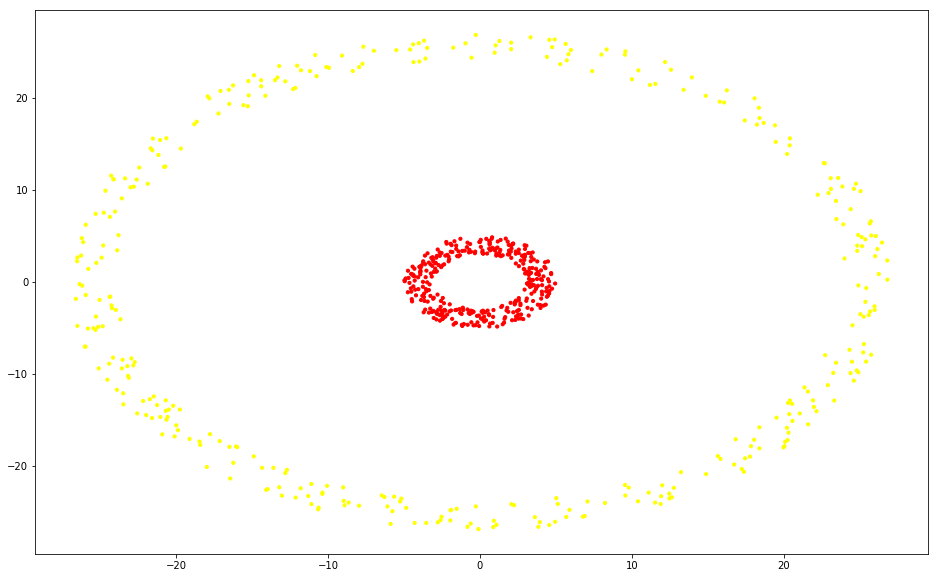

In [3]:
df1 = ring(3, 5)
df2 = ring(24,27)
df = np.concatenate([df1, df2], axis=0)
labels = np.concatenate([[0 for i in range(0,len(df1))],[1 for i in range(0,len(df2))]])

plt.figure(figsize=(16,10))
plt.scatter(df[:,0],df[:,1], c=labels, s=10, cmap="autumn")

# algoritmo con k-means

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(2).fit(df)

In [6]:
clust = km.predict(df)

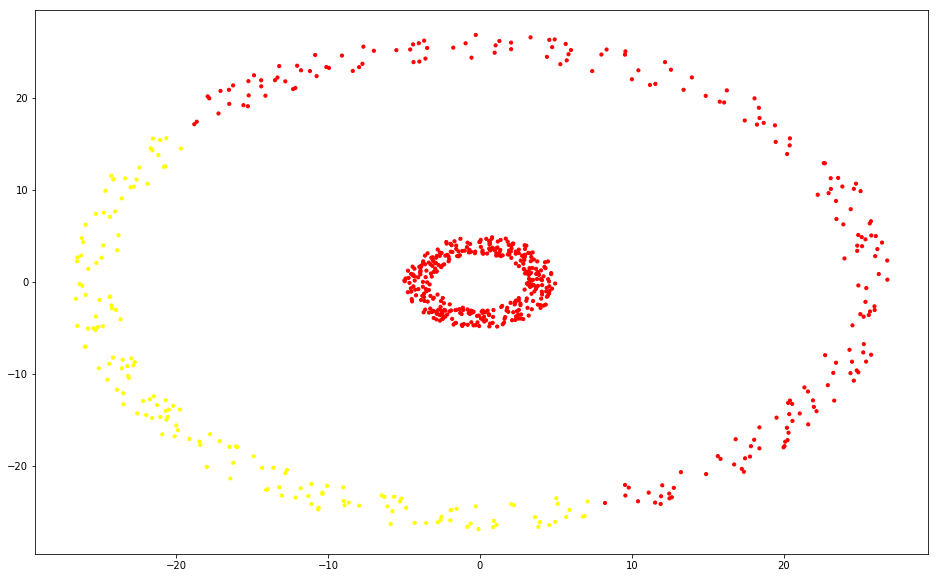

In [7]:
plt.figure(figsize=(16,10))
plt.scatter(df[:,0],df[:,1], c=clust, s=10, cmap="autumn")

# Los K medoides y el clustering espectral

In [8]:
from pyclust import KMedoids

In [11]:
kmed = KMedoids(2).fit_predict(df)

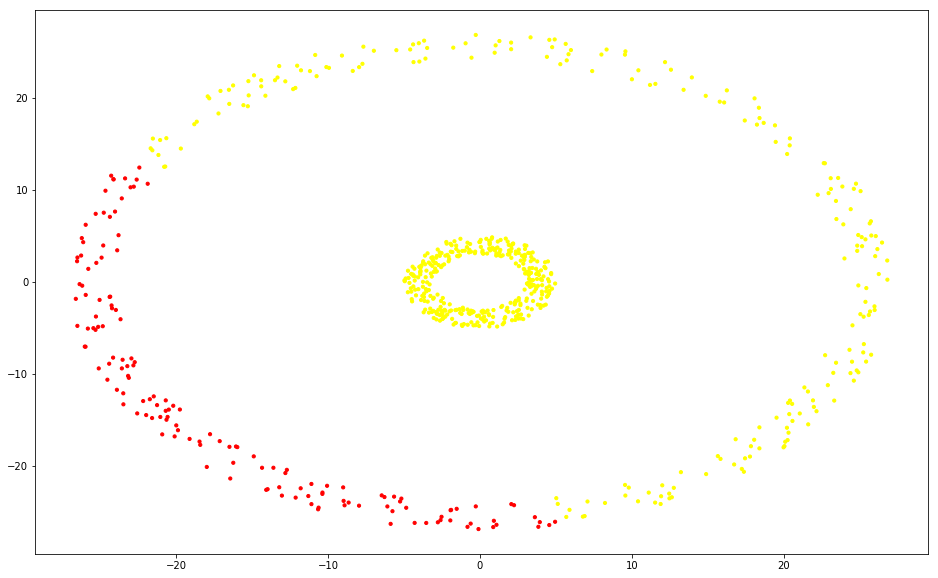

In [13]:
plt.figure(figsize=(16,10))
plt.scatter(df[:,0],df[:,1], c=kmed, s=10, cmap="autumn")

# Algoritmo del clustering espectral 

In [14]:
from sklearn.cluster.spectral import SpectralClustering

In [15]:
clust = SpectralClustering(2).fit_predict(df)

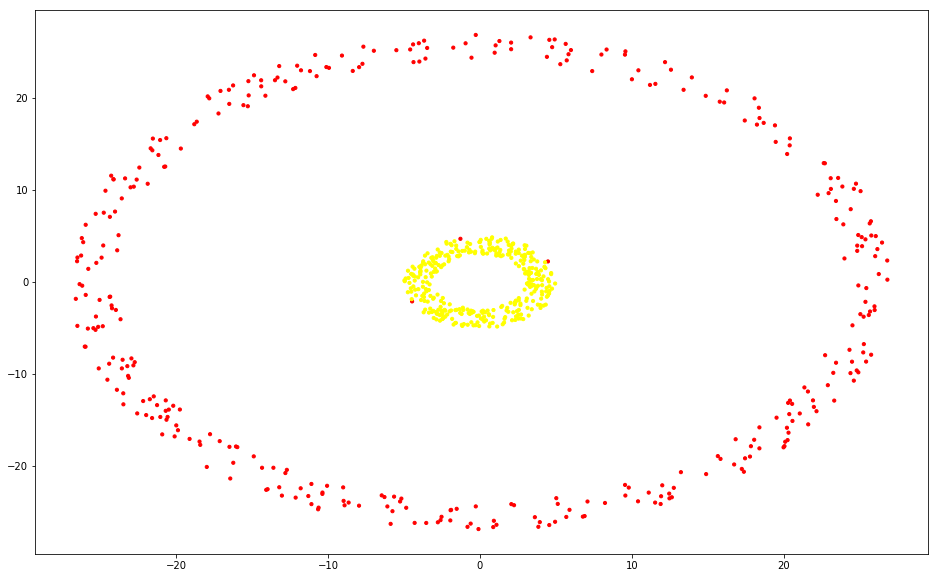

In [17]:
plt.figure(figsize=(16,10))
plt.scatter(df[:,0],df[:,1], c=clust, s=10, cmap="autumn")

* Podemos estimar la k:
    * NO: propagacion de afinidad
    * SI: Podemos usar la distancia euclidea
        * SI: K-Means
        * NO: Buscar valores centrales
            * SI: K-Medoids
            * NO: Los datos son linealmente separables
                * SI: Clustering aglomerativo
                * NO: Clustering espectral
                 